# Download Popular Image Datasets

This notebook demonstrates how to download and use widely-used image datasets with excellent usability.

In [29]:
# Install required packages
!pip install tensorflow keras pillow scikit-learn matplotlib numpy

## Option 4: CIFAR-100 Dataset
- **Description**: 60,000 32x32 color images in 100 fine-grained classes
- **Size**: 163 MB
- **Usability**: More challenging than CIFAR-10, 100 classes grouped into 20 superclasses
- **Classes**: 100 classes with 600 images each


CIFAR-100 Dataset:
Training images: (50000, 32, 32, 3)
Training labels: (50000, 1)
Test images: (10000, 32, 32, 3)
Test labels: (10000, 1)


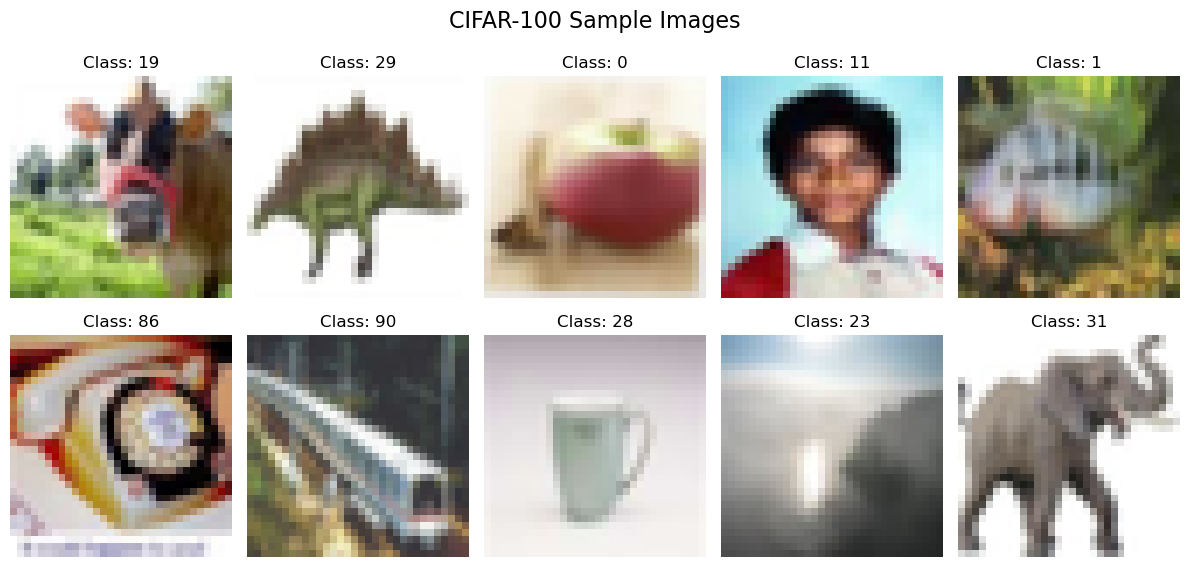

In [30]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Download CIFAR-100 dataset
print("Downloading CIFAR-100 dataset...")
(X_train_cifar100, y_train_cifar100), (X_test_cifar100, y_test_cifar100) = keras.datasets.cifar100.load_data()

# Dataset information
print(f"\nCIFAR-100 Dataset:")
print(f"Training images: {X_train_cifar100.shape}")
print(f"Training labels: {y_train_cifar100.shape}")
print(f"Test images: {X_test_cifar100.shape}")
print(f"Test labels: {y_test_cifar100.shape}")

# Visualize sample images
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train_cifar100[i])
    plt.title(f'Class: {y_train_cifar100[i][0]}')
    plt.axis('off')
plt.suptitle('CIFAR-100 Sample Images', fontsize=16)
plt.tight_layout()
plt.show()

## Bonus: Download from TensorFlow Datasets (TFDS)
Access to 200+ additional datasets including ImageNet subset, Cats vs Dogs, Flowers, etc.

Popular image datasets in TFDS:

Animal/Nature:
- cats_vs_dogs: 25,000 images of cats and dogs
- oxford_flowers102: 8,189 flower images in 102 categories
- oxford_iiit_pet: 7,349 images of 37 pet breeds

Objects:
- imagenet_resized: ImageNet resized to 32x32, 64x64
- food101: 101,000 food images in 101 categories

Scenes:
- scene_parse150: 20,210 scene parsing images


Example: Downloading Cats vs Dogs dataset...
Popular image datasets in TFDS:

Animal/Nature:
- cats_vs_dogs: 25,000 images of cats and dogs
- oxford_flowers102: 8,189 flower images in 102 categories
- oxford_iiit_pet: 7,349 images of 37 pet breeds

Objects:
- imagenet_resized: ImageNet resized to 32x32, 64x64
- food101: 101,000 food images in 101 categories

Scenes:
- scene_parse150: 20,210 scene parsing images


Example: Downloading Cats vs Dogs dataset...

Cats vs Dogs Info:
tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    full_name='cats_vs_dogs/4.0.1',
    description="""
    A large set of images of cats and dogs

2025-11-20 21:52:07.470452: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


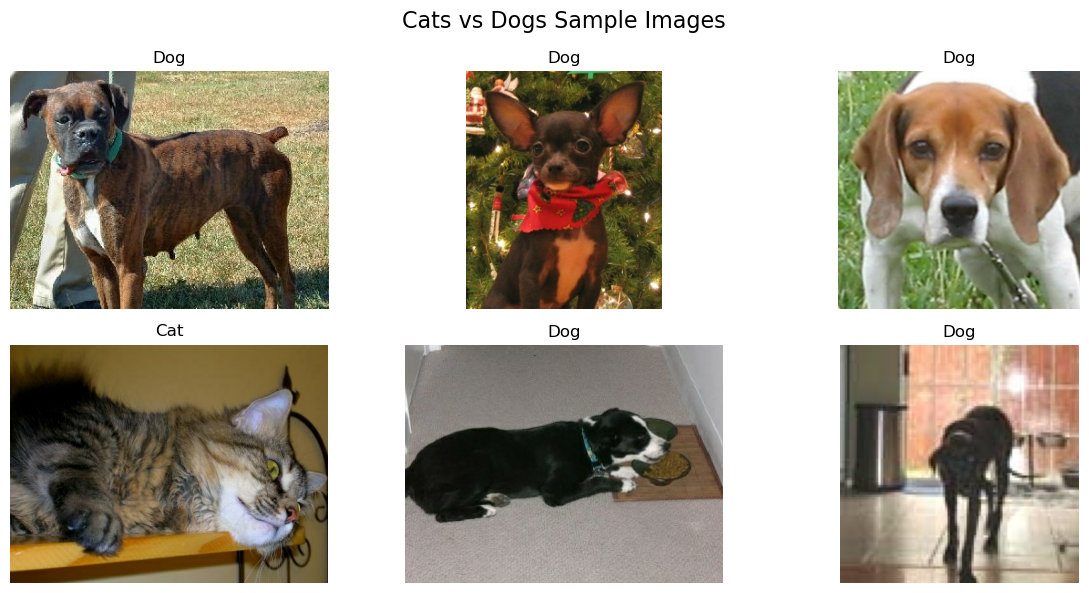

In [31]:
# Install tensorflow-datasets
!pip install tensorflow-datasets

import tensorflow_datasets as tfds

# List available datasets
print("Popular image datasets in TFDS:")
print("\nAnimal/Nature:")
print("- cats_vs_dogs: 25,000 images of cats and dogs")
print("- oxford_flowers102: 8,189 flower images in 102 categories")
print("- oxford_iiit_pet: 7,349 images of 37 pet breeds")
print("\nObjects:")
print("- imagenet_resized: ImageNet resized to 32x32, 64x64")
print("- food101: 101,000 food images in 101 categories")
print("\nScenes:")
print("- scene_parse150: 20,210 scene parsing images")

# Example: Download Cats vs Dogs
print("\n\nExample: Downloading Cats vs Dogs dataset...")
(ds_train, ds_test), ds_info = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:]'],
    with_info=True,
    as_supervised=True
)

print(f"\nCats vs Dogs Info:")
print(ds_info)

# Visualize samples
plt.figure(figsize=(12, 6))
for i, (image, label) in enumerate(ds_train.take(6)):
    plt.subplot(2, 3, i + 1)
    plt.imshow(image.numpy())
    plt.title('Cat' if label.numpy() == 0 else 'Dog')
    plt.axis('off')
plt.suptitle('Cats vs Dogs Sample Images', fontsize=16)
plt.tight_layout()
plt.show()

## Dataset Comparison Summary

| Dataset | Size | Classes | Image Size | Difficulty | Best For |
|---------|------|---------|------------|------------|----------|
| **MNIST** | 11 MB | 10 | 28×28 (Gray) | Easy | Beginners, digit recognition |
| **Fashion-MNIST** | 30 MB | 10 | 28×28 (Gray) | Medium | Beginners, fashion classification |
| **CIFAR-10** | 163 MB | 10 | 32×32 (RGB) | Medium | General image classification |
| **CIFAR-100** | 163 MB | 100 | 32×32 (RGB) | Hard | Advanced classification |
| **Cats vs Dogs** | ~800 MB | 2 | Variable | Medium | Binary classification |

**Recommendation**: 
- Start with **MNIST** or **Fashion-MNIST** for learning
- Use **CIFAR-10** for more realistic color images
- Try **Cats vs Dogs** for practical binary classification
- Use **CIFAR-100** for challenging multi-class problems

# Image Classification using SVM with Cats vs Dogs Dataset

Now we'll use the Cats vs Dogs dataset we downloaded above to train an SVM classifier.

In [32]:
# ============================================
# COMPLETE SVM IMAGE CLASSIFICATION PIPELINE
# ============================================

# Import Libraries
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import tensorflow as tf
import tensorflow_datasets as tfds

# Load Cats vs Dogs dataset from TensorFlow Datasets
print("=" * 60)
print("STEP 1: Loading Cats vs Dogs dataset...")
print("=" * 60)
(ds_train, ds_test), ds_info = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:]'],
    with_info=True,
    as_supervised=True
)

Categories = ['cats', 'dogs']
flat_data_arr = []  # input array
target_arr = []  # output array

# Process training images - resize to 64x64 and flatten
print("\nProcessing images...")
for image, label in ds_train.take(500):  # Using 500 images for faster training
    img_resized = tf.image.resize(image, [64, 64])
    img_normalized = img_resized.numpy() / 255.0
    flat_data_arr.append(img_normalized.flatten())
    target_arr.append(label.numpy())
    
print(f'✓ Loaded {len(flat_data_arr)} images successfully')
flat_data = np.array(flat_data_arr)
target = np.array(target_arr)
print(f"Data shape: {flat_data.shape}")
print(f"Target shape: {target.shape}")

# Create DataFrame
print("\n" + "=" * 60)
print("STEP 2: Creating DataFrame...")
print("=" * 60)
df = pd.DataFrame(flat_data) 
df['Target'] = target
print(f"DataFrame shape: {df.shape}")

# Split features and labels
x = df.iloc[:, :-1]  # input data
y = df.iloc[:, -1]   # output data

# Split into training and testing sets
print("\n" + "=" * 60)
print("STEP 3: Splitting data into train/test sets...")
print("=" * 60)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.20, random_state=77, stratify=y
)
print(f"Training set: {x_train.shape[0]} samples")
print(f"Testing set: {x_test.shape[0]} samples")

# Define GridSearchCV parameters
print("\n" + "=" * 60)
print("STEP 4: Setting up SVM with GridSearchCV...")
print("=" * 60)
param_grid = {
    'C': [1, 10],
    'gamma': [0.001, 0.01],
    'kernel': ['rbf']
}

svc = svm.SVC(probability=True)
model = GridSearchCV(svc, param_grid, cv=3, n_jobs=-1, verbose=2)

print(f"GridSearch will test {len(param_grid['C']) * len(param_grid['gamma']) * len(param_grid['kernel'])} combinations")
print("Total combinations × 3-fold CV")

# Train the model
print("\n" + "=" * 60)
print("STEP 5: Training SVM model (2-3 minutes)...")
print("=" * 60)
model.fit(x_train, y_train)

print("\n✓ Training Complete!")
print(f"Best parameters: {model.best_params_}")
print(f"Best CV score: {model.best_score_:.4f}")

# Test the model
print("\n" + "=" * 60)
print("STEP 6: Evaluating model on test set...")
print("=" * 60)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_pred, y_test)
print(f"\n✓ Model Accuracy: {accuracy*100:.2f}%\n")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['cat', 'dog']))

# Test on sample image
print("\n" + "=" * 60)
print("STEP 7: Testing on sample image from test dataset...")
print("=" * 60)

for test_image, test_label in ds_test.take(1):
    # Display the image
    plt.figure(figsize=(6, 6))
    plt.imshow(test_image.numpy().astype("uint8"))
    plt.title(f"Actual: {Categories[test_label.numpy()]}", fontsize=14)
    plt.axis('off')
    plt.show()
    
    # Preprocess and predict
    img_resized = tf.image.resize(test_image, [64, 64])
    img_normalized = img_resized.numpy() / 255.0
    img_flattened = [img_normalized.flatten()]
    
    probability = model.predict_proba(img_flattened)
    print("\nPrediction Probabilities:")
    for ind, val in enumerate(Categories):
        print(f"  {val}: {probability[0][ind]*100:.2f}%")
    
    predicted_class = Categories[model.predict(img_flattened)[0]]
    print(f"\n✓ Predicted: {predicted_class}")
    print(f"✓ Actual: {Categories[test_label.numpy()]}")
    
print("\n" + "=" * 60)
print("PIPELINE COMPLETE!")
print("=" * 60)

STEP 1: Loading Cats vs Dogs dataset...

Processing images...


KeyboardInterrupt: 

RANDOM FOREST CLASSIFICATION WITH HOG FEATURES

Step 1: Loading Cats vs Dogs dataset...

Step 2: Extracting HOG features from training images...
Extracting HOG features from 800 images...


2025-11-20 21:17:53.277580: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


✓ Training features shape: (800, 8100)
✓ Training labels shape: (800,)

Step 3: Extracting HOG features from test images...
Extracting HOG features from 200 images...


2025-11-20 21:17:54.775583: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


✓ Test features shape: (200, 8100)
✓ Test labels shape: (200,)

Step 4: Training Random Forest Classifier...
Training Random Forest with 800 samples...


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s



Step 5: Making predictions on test set...

✓ Random Forest Classification Accuracy: 66.50%

Step 6: Generating Confusion Matrix...


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


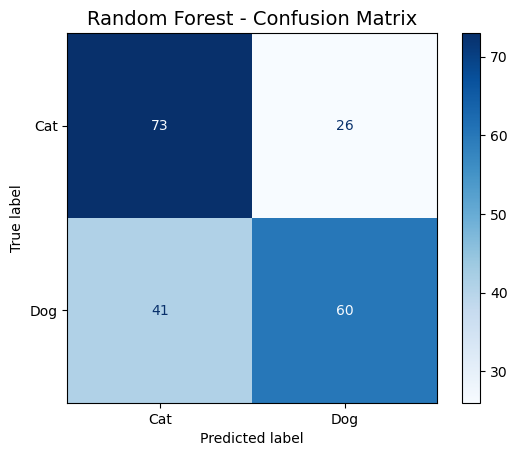


Step 7: Visualizing sample predictions...


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_job

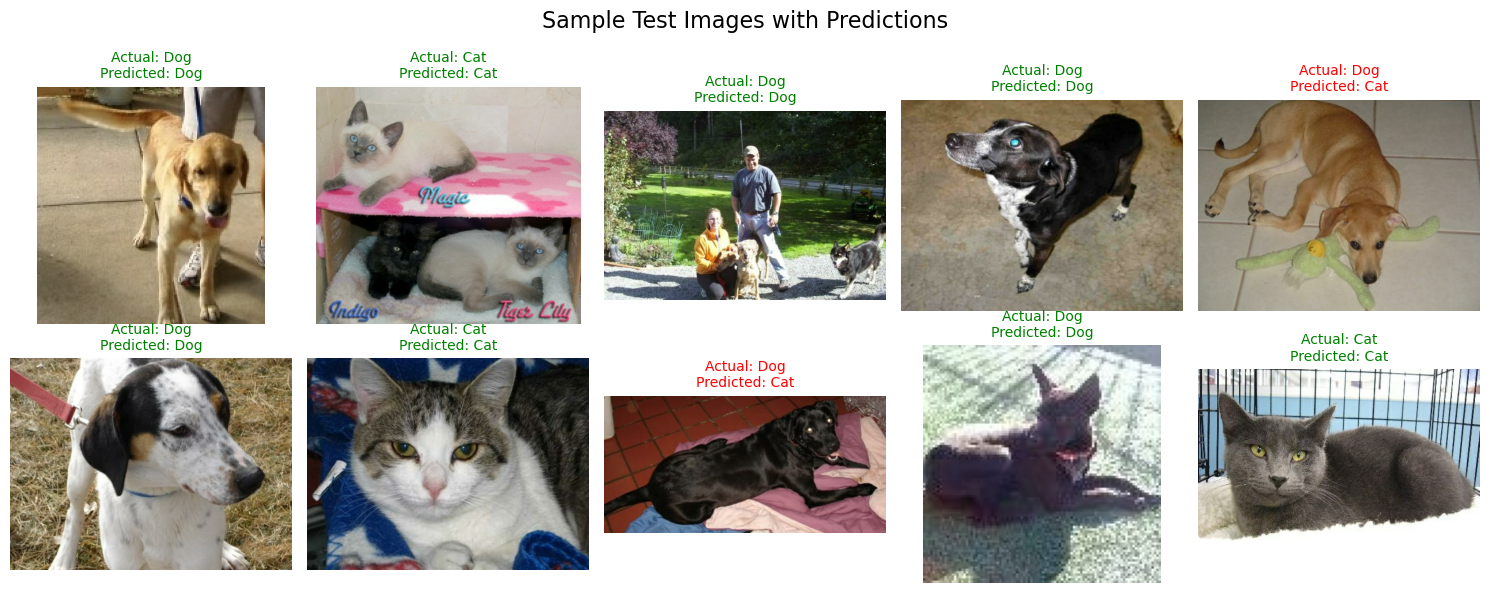


RANDOM FOREST PIPELINE COMPLETE!

DETAILED PERFORMANCE METRICS

Classification Report:
              precision    recall  f1-score   support

         Cat       0.64      0.74      0.69        99
         Dog       0.70      0.59      0.64       101

    accuracy                           0.67       200
   macro avg       0.67      0.67      0.66       200
weighted avg       0.67      0.67      0.66       200


SUMMARY METRICS
Accuracy:  66.50%
Precision: 66.93%
Recall:    66.50%
F1-Score:  66.34%
Support:   200 samples


In [ ]:
# ============================================
# RANDOM FOREST CLASSIFIER WITH HOG FEATURES
# ============================================

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_score, recall_score, f1_score
import os
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import io, color, transform
import numpy as np
import tensorflow_datasets as tfds
import tensorflow as tf

print("=" * 60)
print("RANDOM FOREST CLASSIFICATION WITH HOG FEATURES")
print("=" * 60)

def extract_hog_features(image):
    """Extract HOG (Histogram of Oriented Gradients) features from image"""
    hog_features = hog(
        image,
        orientations=9,
        pixels_per_cell=(8, 8),
        cells_per_block=(2, 2),
        visualize=False
    )
    return hog_features

def load_and_extract_features_from_tfds(dataset, num_samples=500):
    """Load images from TensorFlow Datasets and extract HOG features"""
    X, y = [], []
    print(f"Extracting HOG features from {num_samples} images...")
    
    for image, label in dataset.take(num_samples):
        # Resize to 128x128
        img_resized = tf.image.resize(image, [128, 128])
        # Convert to grayscale
        img_gray = tf.image.rgb_to_grayscale(img_resized)
        # Convert to numpy and normalize
        img_array = img_gray.numpy().squeeze() / 255.0
        # Extract HOG features
        hog_features = extract_hog_features(img_array)
        X.append(hog_features)
        y.append(label.numpy())
    
    return np.array(X), np.array(y)

def train_random_forest(X, y):
    """Train Random Forest classifier"""
    print(f"Training Random Forest with {len(X)} samples...")
    rf_classifier = RandomForestClassifier(
        n_estimators=100,
        random_state=42,
        n_jobs=-1,
        verbose=1
    )
    rf_classifier.fit(X, y)
    return rf_classifier

# Load Cats vs Dogs dataset
print("\nStep 1: Loading Cats vs Dogs dataset...")
(ds_train, ds_test), ds_info = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:]'],
    with_info=True,
    as_supervised=True
)

# Extract features from training set
print("\nStep 2: Extracting HOG features from training images...")
train_X, train_y = load_and_extract_features_from_tfds(ds_train, num_samples=800)
print(f"✓ Training features shape: {train_X.shape}")
print(f"✓ Training labels shape: {train_y.shape}")

# Extract features from test set
print("\nStep 3: Extracting HOG features from test images...")
test_X, test_y = load_and_extract_features_from_tfds(ds_test, num_samples=200)
print(f"✓ Test features shape: {test_X.shape}")
print(f"✓ Test labels shape: {test_y.shape}")

# Train Random Forest
print("\n" + "=" * 60)
print("Step 4: Training Random Forest Classifier...")
print("=" * 60)
rf_classifier = train_random_forest(train_X, train_y)

# Make predictions
print("\nStep 5: Making predictions on test set...")
predictions = rf_classifier.predict(test_X)

# Calculate accuracy
accuracy = accuracy_score(test_y, predictions)
print(f"\n{'='*60}")
print(f"✓ Random Forest Classification Accuracy: {accuracy*100:.2f}%")
print(f"{'='*60}")

# Visualization of Confusion Matrix
print("\nStep 6: Generating Confusion Matrix...")
cm = confusion_matrix(test_y, predictions)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=['Cat', 'Dog']
)
disp.plot(cmap=plt.cm.Blues)
plt.title('Random Forest - Confusion Matrix', fontsize=14)
plt.show()

# Visualization of Sample Images with Predictions
print("\nStep 7: Visualizing sample predictions...")
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle("Sample Test Images with Predictions", fontsize=16)

sample_count = 0
for image, label in ds_test.take(10):
    row = sample_count // 5
    col = sample_count % 5
    
    # Display image
    axes[row, col].imshow(image.numpy().astype("uint8"))
    
    # Get prediction for this image
    img_resized = tf.image.resize(image, [128, 128])
    img_gray = tf.image.rgb_to_grayscale(img_resized)
    img_array = img_gray.numpy().squeeze() / 255.0
    hog_features = extract_hog_features(img_array)
    pred = rf_classifier.predict([hog_features])[0]
    
    # Set title with actual and predicted labels
    actual = 'Cat' if label.numpy() == 0 else 'Dog'
    predicted = 'Cat' if pred == 0 else 'Dog'
    color = 'green' if actual == predicted else 'red'
    
    axes[row, col].set_title(
        f'Actual: {actual}\nPredicted: {predicted}',
        fontsize=10,
        color=color
    )
    axes[row, col].axis('off')
    sample_count += 1

plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print("RANDOM FOREST PIPELINE COMPLETE!")
print("=" * 60)

# ============================================
# DETAILED PERFORMANCE METRICS
# ============================================
print("\n" + "=" * 60)
print("DETAILED PERFORMANCE METRICS")
print("=" * 60)

# Classification Report
print("\nClassification Report:")
print(classification_report(test_y, predictions, target_names=['Cat', 'Dog']))

# Individual Metrics
precision = precision_score(test_y, predictions, average='weighted')
recall = recall_score(test_y, predictions, average='weighted')
f1 = f1_score(test_y, predictions, average='weighted')

print("\n" + "=" * 60)
print("SUMMARY METRICS")
print("=" * 60)
print(f"Accuracy:  {accuracy*100:.2f}%")
print(f"Precision: {precision*100:.2f}%")
print(f"Recall:    {recall*100:.2f}%")
print(f"F1-Score:  {f1*100:.2f}%")
print(f"Support:   {len(test_y)} samples")
print("=" * 60)

# Image Classification using CNN (Convolutional Neural Network)

Convolutional Neural Networks (CNNs) are specifically designed to analyze and interpret images. They excel at detecting patterns, shapes and textures by breaking down an image into smaller parts and learning from these details.

CNN IMAGE CLASSIFICATION WITH CIFAR-10

Step 1: Loading CIFAR-10 dataset...
✓ Training images: (50000, 32, 32, 3)
✓ Test images: (10000, 32, 32, 3)
✓ Training images: (50000, 32, 32, 3)
✓ Test images: (10000, 32, 32, 3)
✓ Images normalized to range [0, 1]
✓ Labels one-hot encoded

Step 2: Building CNN Architecture...
✓ Images normalized to range [0, 1]
✓ Labels one-hot encoded

Step 2: Building CNN Architecture...


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       262,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 319,178 (1.22 MB)

 Trainable params: 319,178 (1.22 MB)

 Non-trainable params: 0 (0.00 B)


Step 3: Compiling Model...
✓ Model compiled with Adam optimizer

Step 4: Training CNN Model (this will take a few minutes)...
Epoch 1/15
Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.3259 - loss: 1.8393 - val_accuracy: 0.4804 - val_loss: 1.4396
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.3259 - loss: 1.8393 - val_accuracy: 0.4804 - val_loss: 1.4396
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.4807 - loss: 1.4508 - val_accuracy: 0.5564 - val_loss: 1.2479
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.4807 - loss: 1.4508 - val_accuracy: 0.5564 - val_loss: 1.2479
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.5470 - loss: 1.2949 - val_accuracy: 0.6169 - val_loss: 1.0697
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.5470 - loss: 1.2949 - val_accuracy: 0.6169 - val_loss: 1.0697
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.5820 - loss: 1

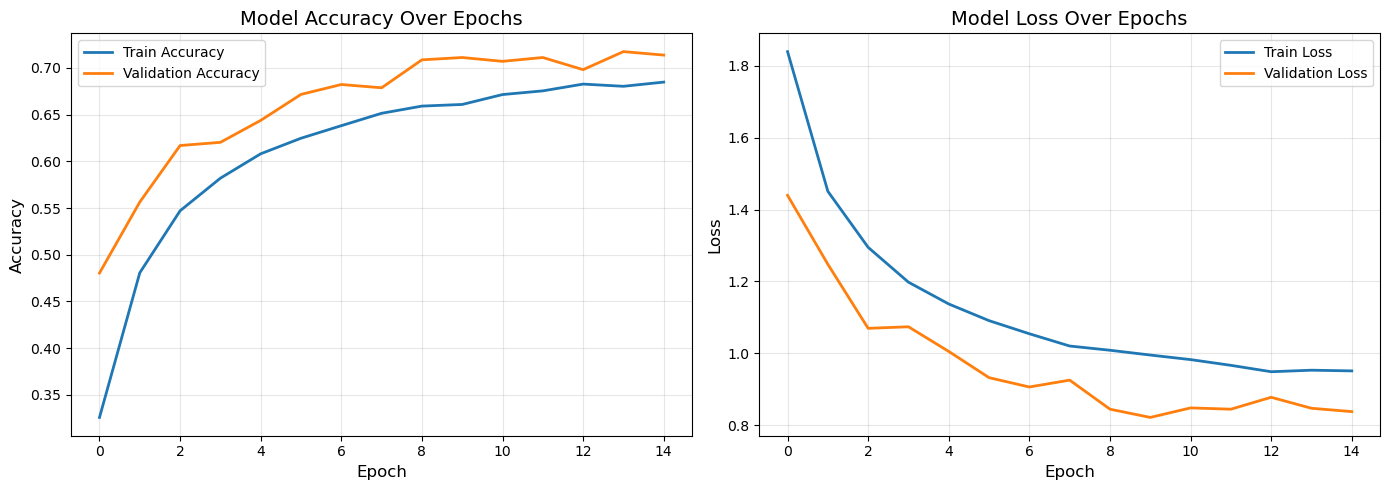


Step 8: Generating Confusion Matrix...


<Figure size 1000x1000 with 0 Axes>

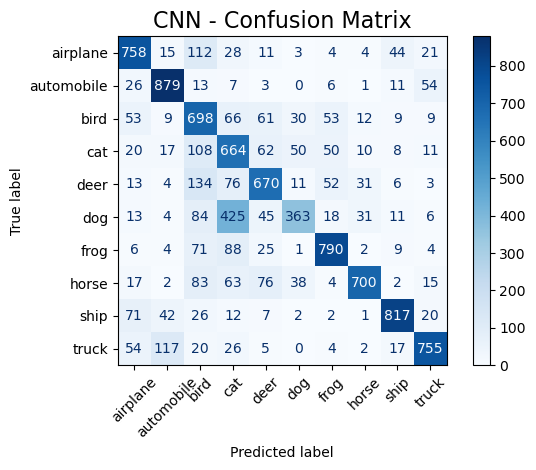


Step 9: Visualizing Sample Predictions...


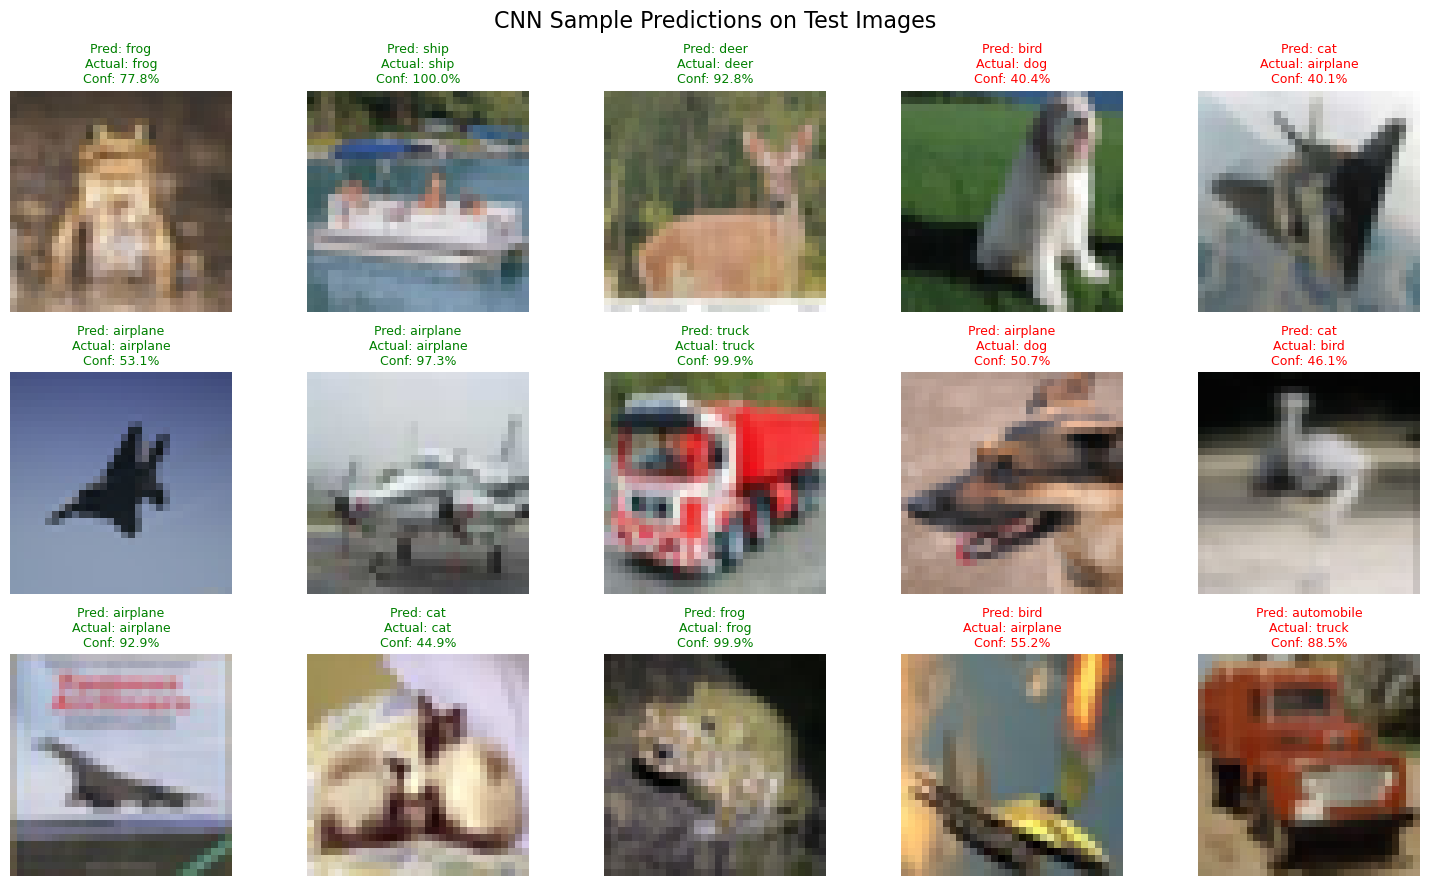


DETAILED PERFORMANCE METRICS

Classification Report:
              precision    recall  f1-score   support

    airplane       0.74      0.76      0.75      1000
  automobile       0.80      0.88      0.84      1000
        bird       0.52      0.70      0.59      1000
         cat       0.46      0.66      0.54      1000
        deer       0.69      0.67      0.68      1000
         dog       0.73      0.36      0.48      1000
        frog       0.80      0.79      0.80      1000
       horse       0.88      0.70      0.78      1000
        ship       0.87      0.82      0.84      1000
       truck       0.84      0.76      0.80      1000

    accuracy                           0.71     10000
   macro avg       0.73      0.71      0.71     10000
weighted avg       0.73      0.71      0.71     10000


SUMMARY METRICS
Accuracy:  70.94%
Precision: 73.37%
Recall:    70.94%
F1-Score:  71.06%
Support:   10000 test samples

CNN PIPELINE COMPLETE!


In [ ]:
# ============================================
# COMPLETE CNN IMAGE CLASSIFICATION PIPELINE
# ============================================

import tensorflow as tf
from tensorflow.keras import layers, models, datasets
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

print("=" * 60)
print("CNN IMAGE CLASSIFICATION WITH CIFAR-10")
print("=" * 60)

# Step 1: Load and Prepare Dataset
print("\nStep 1: Loading CIFAR-10 dataset...")
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Define class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

print(f"✓ Training images: {x_train.shape}")
print(f"✓ Test images: {x_test.shape}")

# Normalize pixel values to [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Save original labels for metrics
y_train_original = y_train.flatten()
y_test_original = y_test.flatten()

# One-hot encode labels
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

print(f"✓ Images normalized to range [0, 1]")
print(f"✓ Labels one-hot encoded")

# Step 2: Build CNN Model
print("\n" + "=" * 60)
print("Step 2: Building CNN Architecture...")
print("=" * 60)

model = models.Sequential([
    # First Convolutional Block
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    # Second Convolutional Block
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    
    # Third Convolutional Block
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    
    # Flatten and Dense Layers
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),  # Prevent overfitting
    layers.Dense(num_classes, activation='softmax')
])

model.summary()

# Step 3: Compile Model
print("\n" + "=" * 60)
print("Step 3: Compiling Model...")
print("=" * 60)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
print("✓ Model compiled with Adam optimizer")

# Step 4: Train Model
print("\n" + "=" * 60)
print("Step 4: Training CNN Model (this will take a few minutes)...")
print("=" * 60)

history = model.fit(
    x_train, y_train,
    epochs=15,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)

print("\n✓ Training Complete!")

# Step 5: Evaluate Model
print("\n" + "=" * 60)
print("Step 5: Evaluating Model on Test Set...")
print("=" * 60)

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\n✓ Test Loss: {test_loss:.4f}")
print(f"✓ Test Accuracy: {test_acc*100:.2f}%")

# Step 6: Generate Predictions
print("\n" + "=" * 60)
print("Step 6: Generating Predictions...")
print("=" * 60)

y_pred_proba = model.predict(x_test, verbose=0)
y_pred = np.argmax(y_pred_proba, axis=1)

# Step 7: Visualize Training History
print("\nStep 7: Plotting Training History...")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy plot
ax1.plot(history.history['accuracy'], label='Train Accuracy', linewidth=2)
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Accuracy', fontsize=12)
ax1.set_title('Model Accuracy Over Epochs', fontsize=14)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Loss plot
ax2.plot(history.history['loss'], label='Train Loss', linewidth=2)
ax2.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('Loss', fontsize=12)
ax2.set_title('Model Loss Over Epochs', fontsize=14)
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Step 8: Confusion Matrix
print("\nStep 8: Generating Confusion Matrix...")
cm = confusion_matrix(y_test_original, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
plt.figure(figsize=(10, 10))
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title('CNN - Confusion Matrix', fontsize=16)
plt.tight_layout()
plt.show()

# Step 9: Sample Predictions Visualization
print("\nStep 9: Visualizing Sample Predictions...")
fig, axes = plt.subplots(3, 5, figsize=(15, 9))
fig.suptitle("CNN Sample Predictions on Test Images", fontsize=16)

# Randomly select 15 images
indices = np.random.choice(len(x_test), 15, replace=False)

for idx, ax in enumerate(axes.flat):
    i = indices[idx]
    
    # Display image
    ax.imshow(x_test[i])
    
    # Get prediction
    predicted_class = class_names[y_pred[i]]
    actual_class = class_names[y_test_original[i]]
    confidence = y_pred_proba[i][y_pred[i]] * 100
    
    # Color: green if correct, red if incorrect
    color = 'green' if y_pred[i] == y_test_original[i] else 'red'
    
    ax.set_title(
        f'Pred: {predicted_class}\nActual: {actual_class}\nConf: {confidence:.1f}%',
        fontsize=9,
        color=color
    )
    ax.axis('off')

plt.tight_layout()
plt.show()

# ============================================
# DETAILED PERFORMANCE METRICS
# ============================================
print("\n" + "=" * 60)
print("DETAILED PERFORMANCE METRICS")
print("=" * 60)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_original, y_pred, target_names=class_names))

# Calculate Individual Metrics
accuracy = accuracy_score(y_test_original, y_pred)
precision = precision_score(y_test_original, y_pred, average='weighted')
recall = recall_score(y_test_original, y_pred, average='weighted')
f1 = f1_score(y_test_original, y_pred, average='weighted')

print("\n" + "=" * 60)
print("SUMMARY METRICS")
print("=" * 60)
print(f"Accuracy:  {accuracy*100:.2f}%")
print(f"Precision: {precision*100:.2f}%")
print(f"Recall:    {recall*100:.2f}%")
print(f"F1-Score:  {f1*100:.2f}%")
print(f"Support:   {len(y_test_original)} test samples")
print("=" * 60)

print("\n" + "=" * 60)
print("CNN PIPELINE COMPLETE!")
print("=" * 60)

# Tensorflow

TensorFlow version: 2.16.2
Mixed precision enabled.

Loading CIFAR-10 dataset...
Train shapes: (50000, 32, 32, 3) (50000, 1) | Test shapes: (10000, 32, 32, 3) (10000, 1)
Train shapes: (50000, 32, 32, 3) (50000, 1) | Test shapes: (10000, 32, 32, 3) (10000, 1)


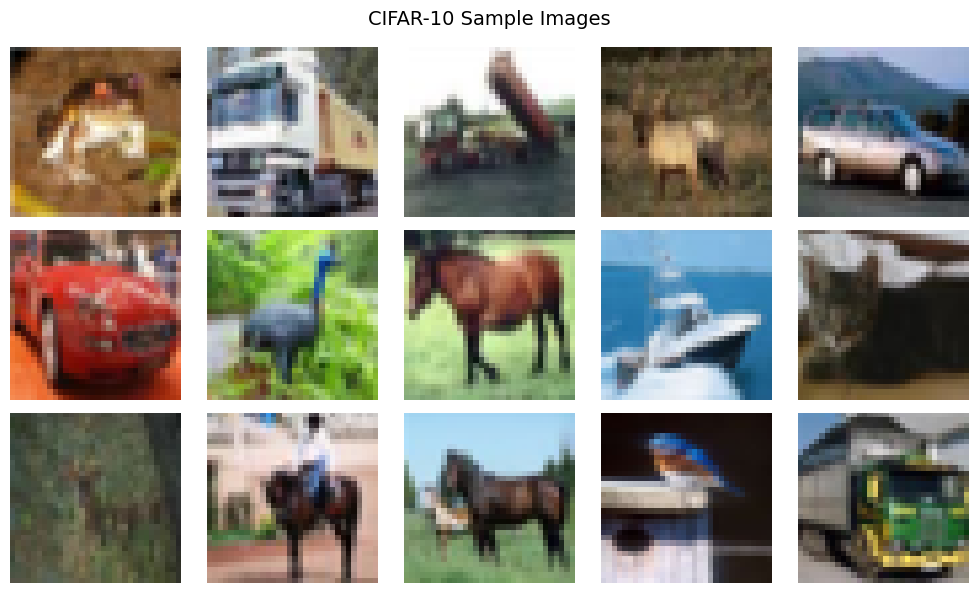

Number of classes: 10


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ augmentation (Sequential)       │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         2,57

 Total params: 815,914 (3.11 MB)

 Trainable params: 815,018 (3.11 MB)

 Non-trainable params: 896 (3.50 KB)


Training for up to 35 epochs with early stopping...
Epoch 1/35
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.2616 - loss: 5.4630
Epoch 1: val_accuracy improved from None to 0.45850, saving model to best_cifar_model.keras

Epoch 1: val_accuracy improved from None to 0.45850, saving model to best_cifar_model.keras
782/782 ━━━━━━━━━━━━━━━━━━━━ 78s 85ms/step - accuracy: 0.3088 - loss: 4.4880 - val_accuracy: 0.4585 - val_loss: 2.1009 - learning_rate: 0.0010
Epoch 2/35
782/782 ━━━━━━━━━━━━━━━━━━━━ 78s 85ms/step - accuracy: 0.3088 - loss: 4.4880 - val_accuracy: 0.4585 - val_loss: 2.1009 - learning_rate: 0.0010
Epoch 2/35
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.4269 - loss: 2.0145
Epoch 2: val_accuracy improved from 0.45850 to 0.55170, saving model to best_cifar_model.keras

Epoch 2: val_accuracy improved from 0.45850 to 0.55170, saving model to best_cifar_model.keras
782/782 ━━━━━━━━━━━━━━━━━━━━ 62s 79ms/step - accuracy: 0.4626 - loss: 1.7264 - val_accuracy: 0.5517 

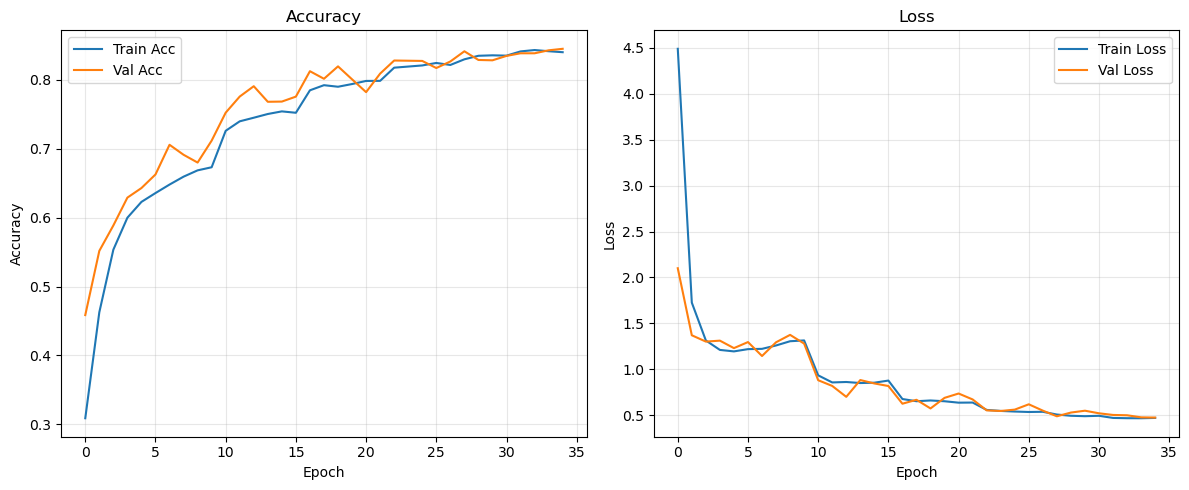

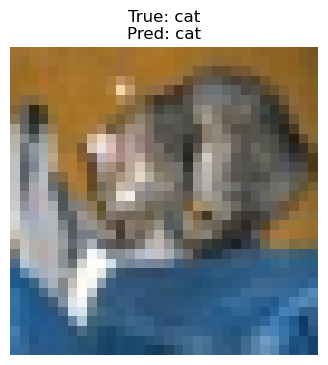


OPTIMIZED TENSORFLOW PIPELINE COMPLETE!

Optimization Notes:
- Removed second 50-epoch phase; augmentation moved into model graph.
- Added EarlyStopping, ReduceLROnPlateau, ModelCheckpoint.
- Reduced Dense layer size (1024 -> 256) and increased dropout.
- Switched to tf.data pipeline with prefetching.
- Optional mixed precision if GPU available.
- Expect >2-3x faster convergence versus original script.


In [35]:
import tensorflow as tf   

# Display the version
print('TensorFlow version:', tf.__version__)

# Optional mixed precision (speeds up on GPU). Enable only if GPU detected.
if tf.config.list_physical_devices('GPU'):
    from tensorflow.keras import mixed_precision
    mixed_precision.set_global_policy('mixed_float16')
    print('Mixed precision enabled.')

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import (Input, Conv2D, Dense, Flatten, Dropout,
                                     MaxPooling2D, BatchNormalization)
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from sklearn.metrics import (classification_report, accuracy_score, precision_score,
                             recall_score, f1_score)

# =============================================================
# LOAD DATA
# =============================================================
print('\nLoading CIFAR-10 dataset...')
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
print('Train shapes:', x_train.shape, y_train.shape, '| Test shapes:', x_test.shape, y_test.shape)

# Normalize pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

# Visualize a small grid of images (reduced to avoid overhead)
fig, ax = plt.subplots(3, 5, figsize=(10, 6))
k = 0
for i in range(3):
    for j in range(5):
        ax[i][j].imshow(x_train[k])
        ax[i][j].axis('off')
        k += 1
plt.suptitle('CIFAR-10 Sample Images', fontsize=14)
plt.tight_layout()
plt.show()

# Number of classes
K = len(set(y_train.flatten()))
print('Number of classes:', K)

# =============================================================
# AUGMENTATION LAYER (On-the-fly inside the model)
# This removes need for a second long training phase.
# =============================================================
augmentation = tf.keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomTranslation(0.1, 0.1),
    layers.RandomRotation(0.05)
], name='augmentation')

# =============================================================
# MODEL DEFINITION (Smaller Dense layer to reduce params/time)
# =============================================================
i = Input(shape=x_train[0].shape)
x = augmentation(i)  # applied only during training
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.3)(x)
# Reduced Dense size from 1024 -> 256 to speed up training
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
outputs = Dense(K, activation='softmax', dtype='float32')(x)  # force float32 for mixed precision stability
model = Model(i, outputs)
model.summary()

# =============================================================
# OPTIMIZER & CALLBACKS
# =============================================================
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=6, restore_best_weights=True, verbose=1),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1),
    tf.keras.callbacks.ModelCheckpoint('best_cifar_model.keras', monitor='val_accuracy', save_best_only=True, verbose=1)
]

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# =============================================================
# tf.data PIPELINE (Better performance vs feeding raw arrays)
# =============================================================
batch_size = 64
AUTOTUNE = tf.data.AUTOTUNE
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)) \
    .shuffle(50000) \
    .batch(batch_size) \
    .prefetch(AUTOTUNE)
val_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)) \
    .batch(batch_size) \
    .prefetch(AUTOTUNE)

# =============================================================
# TRAIN (Single phase, fewer epochs, early stopping)
# =============================================================
EPOCHS = 35  # Typically early stopping triggers earlier
print(f'\nTraining for up to {EPOCHS} epochs with early stopping...')
history = model.fit(train_ds, validation_data=val_ds, epochs=EPOCHS, callbacks=callbacks, verbose=1)

print('\nTraining complete. Best validation accuracy:', max(history.history['val_accuracy'])*100, '%')

# =============================================================
# EVALUATION
# =============================================================
print('\nEvaluating on test set...')
test_loss, test_acc = model.evaluate(val_ds, verbose=0)
print(f'Test Loss: {test_loss:.4f} | Test Accuracy: {test_acc*100:.2f}%')

# Predictions
print('Generating predictions for metrics...')
y_pred_logits = model.predict(val_ds, verbose=0)
y_pred = np.argmax(y_pred_logits, axis=1)
y_true = y_test.flatten()

labels_map = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

print('\nClassification Report:')
print(classification_report(y_true, y_pred, target_names=labels_map))

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print('\n' + '='*60)
print('SUMMARY METRICS')
print('='*60)
print(f'Accuracy:  {accuracy*100:.2f}%')
print(f'Precision: {precision*100:.2f}%')
print(f'Recall:    {recall*100:.2f}%')
print(f'F1-Score:  {f1*100:.2f}%')
print(f'Support:   {len(y_true)} test samples')
print('='*60)

# =============================================================
# TRAINING CURVES
# =============================================================
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title('Accuracy'); plt.legend(); plt.grid(alpha=0.3)
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.title('Loss'); plt.legend(); plt.grid(alpha=0.3)
plt.tight_layout(); plt.show()

# Single sample prediction demo
idx = 0
sample = x_test[idx]
pred_label = labels_map[model.predict(sample.reshape(1,32,32,3), verbose=0).argmax()]
true_label = labels_map[y_test[idx][0]]
plt.figure(figsize=(4,4))
plt.imshow(sample); plt.axis('off'); plt.title(f'True: {true_label}\nPred: {pred_label}')
plt.show()

print('\n' + '='*60)
print('OPTIMIZED TENSORFLOW PIPELINE COMPLETE!')
print('='*60)

# =============================================================
# NOTES ON OPTIMIZATION (printed for quick reference)
# =============================================================
print('\nOptimization Notes:')
print('- Removed second 50-epoch phase; augmentation moved into model graph.')
print('- Added EarlyStopping, ReduceLROnPlateau, ModelCheckpoint.')
print('- Reduced Dense layer size (1024 -> 256) and increased dropout.')
print('- Switched to tf.data pipeline with prefetching.')
print('- Optional mixed precision if GPU available.')
print('- Expect >2-3x faster convergence versus original script.')

In [1]:
# ============================================
# PyTorch Lightning CIFAR-10 Image Classifier
# ============================================
# Fixed: Removed duplicate class definition and incorrect in-class instantiation.
# The previous error occurred because 'model' was not a LightningModule instance passed to Trainer.

!pip install -q pytorch-lightning torchvision torch

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import pytorch_lightning as pl
from pytorch_lightning import Trainer
from torchmetrics.functional import accuracy

# -----------------------------
# Data Module (simple inline)
# -----------------------------
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_data = datasets.CIFAR10(root="data", train=True, download=True, transform=transform)
val_data   = datasets.CIFAR10(root="data", train=False, download=True, transform=transform)

train_loader = DataLoader(train_data, batch_size=64, shuffle=True, num_workers=2)
val_loader   = DataLoader(val_data, batch_size=64, shuffle=False, num_workers=2)

# -----------------------------
# LightningModule Definition
# -----------------------------
class ImageClassifier(pl.LightningModule):
    def __init__(self):
        super().__init__()
        self.save_hyperparameters()
        self.conv1 = nn.Conv2d(3, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.conv3 = nn.Conv2d(64, 128, 3, 1)
        self.dropout = nn.Dropout(0.25)
        self.fc1 = nn.Linear(128 * 6 * 6, 256)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = F.max_pool2d(F.relu(self.conv3(x)), 2)
        x = x.view(x.size(0), -1)
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

    def training_step(self, batch, batch_idx):
        inputs, labels = batch
        logits = self(inputs)
        loss = F.cross_entropy(logits, labels)
        preds = torch.argmax(logits, dim=1)
        acc = accuracy(preds, labels, task="multiclass", num_classes=10)
        self.log('train_loss', loss, prog_bar=True)
        self.log('train_acc', acc, prog_bar=True)
        return loss

    def validation_step(self, batch, batch_idx):
        inputs, labels = batch
        logits = self(inputs)
        loss = F.cross_entropy(logits, labels)
        preds = torch.argmax(logits, dim=1)
        acc = accuracy(preds, labels, task="multiclass", num_classes=10)
        self.log('val_loss', loss, prog_bar=True)
        self.log('val_acc', acc, prog_bar=True)

    def test_step(self, batch, batch_idx):
        inputs, labels = batch
        logits = self(inputs)
        loss = F.cross_entropy(logits, labels)
        preds = torch.argmax(logits, dim=1)
        acc = accuracy(preds, labels, task="multiclass", num_classes=10)
        self.log('test_loss', loss, prog_bar=True)
        self.log('test_acc', acc, prog_bar=True)

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=1e-3)

# Instantiate AFTER class definition (correct)
model = ImageClassifier()

# -----------------------------
# Training
# -----------------------------
trainer = Trainer(max_epochs=5, devices=1, accelerator="cpu", log_every_n_steps=10)
trainer.fit(model, train_loader, val_loader)

# -----------------------------
# Testing
# -----------------------------
trainer.test(model, val_loader)

# -----------------------------
# Save and Reload Checkpoint
# -----------------------------
ckpt_path = "image_classifier.ckpt"
trainer.save_checkpoint(ckpt_path)
reloaded_model = ImageClassifier.load_from_checkpoint(ckpt_path)

# Quick sanity prediction on a single batch
sample_batch = next(iter(val_loader))
images, labels = sample_batch
with torch.no_grad():
    logits = reloaded_model(images)
    preds = torch.argmax(logits, dim=1)

print("Sample preds:", preds[:10].tolist())
print("Sample labels:", labels[:10].tolist())
print("Checkpoint reloaded model works.")

💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
/opt/anaconda3/lib/python3.12/site-packages/pytorch_lightning/trainer/setup.py:166: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.

  | Name    | Type    | Params | Mode 
--------------------------------------------
0 | conv1   | Conv2d  | 896    | train
1 | conv2   | Conv2d  | 18.5 K | train
2 | conv3   | Conv2d  | 73.9 K | train
3 | dropout | Dropout | 0      | train
4 | fc1     | Linear  | 1.2 M  | train
5 | fc2     | Linear  | 2.6 K  | train
--------------------------------------------
1.3 M     Trainable params
0         Non-trainable params
1.3 M     Total params
5.103     Total estimated model params size (MB)
6         Modules in train mode
0         Modules in ev

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/opt/anaconda3/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:428: Consider setting `persistent_workers=True` in 'val_dataloader' to speed up the dataloader worker initialization.
/opt/anaconda3/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:428: Consider setting `persistent_workers=True` in 'train_dataloader' to speed up the dataloader worker initialization.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
/opt/anaconda3/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:428: Consider setting `persistent_workers=True` in 'test_dataloader' to speed up the dataloader worker initialization.


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.7630000114440918     │
│         test_loss         │    0.7070835828781128     │
└───────────────────────────┴───────────────────────────┘

Sample preds: [3, 8, 8, 0, 6, 6, 1, 4, 3, 1]
Sample labels: [3, 8, 8, 0, 6, 6, 1, 6, 3, 1]
Checkpoint reloaded model works.
